![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# ADSA Workshop 5 - Data Mining with Web APIs
Workshop content created by Shivam Bharuka and Jackson Davis, with some content adapted from:
* [Data Science from Scratch - First Principles with Python](http://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X).

In this workshop, we will discuss the OAuth authentication protocol, what web APIs are, and how we can use them to get meaningful data for our projects. We will be working with the Twitter and Alchemy APIs, and cover examples showing how we can pull, run computations on, and visualize real world data. Finally, we will go over an example of how to generate tweets using Markov models!

If you’ve missed out on any of our previous Python workshops (Basic Python, Advanced Python, Numpy, Statistics, and Probability, and Pandas and Matplotlib) or want to learn Python from scratch, we have provided follow-along tutorials on our GitHub: https://github.com/ADSA-UIUC. Installation instructions are included in the Introduction to Python tutorial.
***

# What Is an API?

As we know, the internet contains a massive amount of useful data. In order to access this data (weather reports, news articles, social media posts, etc.), developers often have to write programs known as web scrapers, which manually go through a web page's HTML code in order to extract data. This is often a very tedious task, and any changes made to the HTML code on the company's end would often require us to make changes to our web scraper. 

An API, or Application Programming Interface, is a interface provided by a company or organization, which allows us to explicitly request data in a structured format without having to rely on a web scraper to get the data ourselves!

# JSON

In order to effectively communicate data between a server and a client, us in this case, developers often rely on a data model known as JSON. JSON, or JavaScript Object Notation, is a text-based format containing keys and values, which acts extremely similar to a Python dictionary.

JSON can be thought of the equivalent of a dictionary in JavaScript, a language widely used in web development, and though this format is native to JavaScript, Python provides us with tools for parsing the data into a format it can understand. 

Here is an example of a JSON object:

In [1]:
"""{"title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2014,
"topics" : [ "data", "science", "data science"] }"""

'{"title" : "Data Science Book",\n"author" : "Joel Grus",\n"publicationYear" : 2014,\n"topics" : [ "data", "science", "data science"] }'

This might look identical to a dictionary, however, JSON is sent as a string of a text rather than a data structure. Furthermore in real servers, there will be more information than just the JSON object returned from a request (we will go over examples of this shortly). Now, we can discuss how we request data from a server.

# HTTP Requests

The HTTP protocol is a system dictating how both requests and responses should be made through the internet. This system is supported by all browsers, and is the basis for how information is transfered through the web. We will now discuss how data is requested through the HTTP protocol.

When a client makes a request, either through a web browser or coding language, attached to that request is a HTTP verb label, telling the server what sort of request is being made. The HTTP protocol has defined a list of "HTTP Methods", or "HTTP Verbs", outlining what requests we can make. A full list of the HTTP request methods can be found [here](http://www.tutorialspoint.com/http/http_requests.htm), however we can quickly go over the two most commonly used requests.

### GET 

A HTTP GET request is sent to a specific URL or URI (more on this shortly) when a client wants to retrieve information from a server. In this case, the server will pull the requested information from its database, package it into JSON (or XML in some cases), and return the data as a HTTP response. As we will discuss in a second, a server knows which information to return based on what URL the GET request is sent to. After a GET request, no data is changed on the servers end, it is only copied and sent to the client.

### POST

On the other hand, A HTTP POST request is sent to a specific URL or URI when a client wants to send information to a server. The data sent to a server is often packaged into what we call "forms or headers" rather than the actual URL we see (we will show an example of this later). In this case, the server will take whatever information has been sent, and modify its database to add the new data. When it completes its task, the server will often return a HTTP response stating whether the data went through properly or not. POST requests are used often in things such as Facebook or social media posts in general, or any time new data is being sent from a client to a server.

# HTTP Responses

Whenever a server receives a request, it will notify the client whether or not its request went through properly through a number of HTTP respose codes. While verbs such as GET, POST, PATCH, or PUT are used for HTTP requests, 3 digit status codes are used for HTTP responses. The full list of HTTP response codes can be viewed [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). While there are many codes, in general, there are only 5 major categories, broken up by 100s, of responses. These are:
* 1xx - Informational Responses
* 2xx - Success Responses
* 3xx - Redirection Responses
* 4xx - Client Error Responses
* 5xx - Server Error Responses

If any of this sounds confusing, an example that many of us have seen of a response code is 404, or Not Found. We often see this code when we are trying to go to a webpage that no longer exists, or a URL extension that is not valid. An example of a 404 error can be found at https://www.facebook.com/wut. Since this URL does not actual exist, and there is no specific data for that page, Facebook, or servers in general, will often make a placeholder page like the one shown. On any page that does exist, though, our goal is to receive a 200 or 2xx response code, meaning that everything is ok!

# What happens when URL(adsauiuc.com) is entered into your browser?

* When ‘a’ is typed then the browser receives the event and auto-complete machinery algorithms are run.
* After enter is pressed, browser has the protocol (http) and resource (/) in the URL(Uniform Resource Locator).
* Browser checks the HSTS list which has the websites to be contacted via https only.
* Browser checks if the website is in its cache. If not then it makes a request to the DNS (Domain Name System) server to receive the IP address of the destination server.
* Now it takes the IP address and the given port number (the HTTP protocol defaults to port 80, and HTTPS to port 443) to open a TCP (Transmission Control Protocol) connection with the server.
* Browser sends a HTTP request via TCP connection. The request to the server is of the form:

	GET / HTTP/1.1
	Host: adsauiuc.com
	Connection: close
	[other headers]

	where HTTP/1.1 defines a close connection option for the sender.
* The web server looks up for a cookie file that it has set. If it finds one, it sends it to the server with the URL. If there are no cookie file associated then the server creates a new ID in its database and sends it to the client’s machine which is stored as a name-value pair in the hard-disk.
* The server responds with a response code denoting the status of the request. It then sends a payload of HTML content of www.adsauiuc.com. 
* If cacheable, response is stored in cache.
* Once the server provides the resources including HTML, CSS, JS etc it undergoes the below processes:
	* Parsing: HTML, CSS, JS
	* Rendering: Constructing a DOM tree -> Render Tree.


# OAuth

Considering the private nature of a lot of the data in social media websites, or servers in general, as well as the private nature of a client's password information, many APIs require you to comply with the OAuth authentication protocol. The OAuth protocol allows an access token to be created corresponding to a user, which gives that user access to various API functionality. In order to create an access token, many APIs require users to enter their user and password information one time, which is then converted into a token. By using a OAuth token rather than requiring a user to enter their password, it assures that the clients password information is not visible to anyone on or watching a server. 

While the specifics of the OAuth protocol are not important for now, it is necessary to know that most APIs will require you to authenticate your information with the server, and send requests with an access token.

# Using an API

Since HTTP gives us a convenient and defined way of carrying out web communication, companies and organizations began to create a well-defined list of URL's which, when sent an HTTP request, will return specific pieces of data. 

We will now go over some examples using the OpenWeatherMap API. The OpenWeatherMap documentation is located [here](http://openweathermap.org/api), and contains information about making requests, the structure of its responses, and the various URL's and HTTP verbs to use to retrieve data. 

In order to interact with the API, we are required to make a developer account so OpenWeather knows where its requests are coming from. For the purposes of this demo, I have created an account using an extra email. (Note that there are limits to how many requests we can make per day, so the account may not always work if multiple people are following this tutorial at once).

## Python Requests

In order to make HTTP requests in Python, we can use the conveniently named requests library. As mentioned, in order to use the OpenWeather we need to authorize our account. Each API works differently, so it's important to read the documentation. I have already saved us the trouble of registering for a developer account and receiving an OAuth token as described on [this link](http://openweathermap.org/appid#use).

Since we have the OAuth token, we can now make requests to the OpenWeatherMap API like so:

In [2]:
import requests

# From following the authorization instructions online
api_key = "a0ed496d90b0244be3083ed1223af1e4"

city = "Chicago"
endpoint = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key

# requests.get sends a GET request to the specified endpoint, and we can see its response using .text
json_weather = requests.get(endpoint).text

print json_weather 
print type(json_weather)

{"coord":{"lon":-87.65,"lat":41.85},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"cmc stations","main":{"temp":286.13,"pressure":1008,"humidity":35,"temp_min":284.15,"temp_max":288.15},"wind":{"speed":10.3,"deg":200,"gust":14.9},"clouds":{"all":20},"dt":1459708275,"sys":{"type":1,"id":961,"message":0.0035,"country":"US","sunrise":1459682870,"sunset":1459729185},"id":4887398,"name":"Chicago","cod":200}
<type 'unicode'>


The above code works great for getting a JSON text response from the OpenWeatherAPI, however, what if we wanted a Python dictionary? By importing the json library, we can quickly convert over the text format to a dictionary!

In [3]:
import requests, json

city = "London"
endpoint = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key

# json.loads() converts a json string to a dictionary
weather = json.loads(requests.get(endpoint).text)

print type(weather)
print
print weather 

<type 'dict'>

{u'clouds': {u'all': 64}, u'name': u'London', u'rain': {u'1h': 0.4}, u'sys': {u'country': u'GB', u'sunset': 1459708742, u'message': 0.0129, u'type': 1, u'id': 5091, u'sunrise': 1459661333}, u'weather': [{u'main': u'Rain', u'id': 521, u'icon': u'09d', u'description': u'shower rain'}], u'coord': {u'lat': 51.51, u'lon': -0.13}, u'base': u'cmc stations', u'dt': 1459705930, u'main': {u'pressure': 1003, u'temp_min': 286.15, u'temp_max': 289.15, u'temp': 287.65, u'humidity': 62}, u'id': 2643743, u'wind': {u'speed': 4.6, u'deg': 80}, u'cod': 200}


By putting this all together, we can create an app that pulls specific information about the weather in any city.

In [4]:
import requests, json

city = raw_input("Enter a city: ")
endpoint = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key

# requests.get sends a GET request to the specified endpoint, and we can see its response using .text
weather = json.loads(requests.get(endpoint).text)
print
print 'It is currently ' + str(weather['main']['temp']) + "°K, with a pressure of " + str(weather['main']['pressure']) + 'hPa in ' + city + '.' 

Enter a city: London

It is currently 287.65°K, with a pressure of 1003hPa in London.


Although this example is simple, hopefully you can see how using APIs allows us to easily pull real time data. 

Enter city1: Chicago
Enter city2: London
Enter city3: Beirut
Enter city4: Budapest


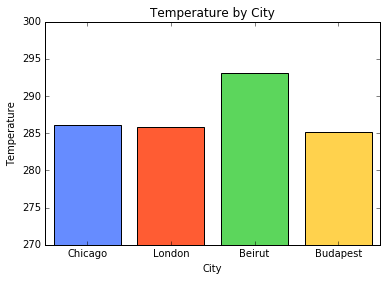

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests, json

city1 = raw_input("Enter city1: ")
city2 = raw_input("Enter city2: ")
city3 = raw_input("Enter city3: ")
city4 = raw_input("Enter city4: ")

endpoint1 = "http://api.openweathermap.org/data/2.5/weather?q=" + city1 + "&APPID=" + api_key
endpoint2 = "http://api.openweathermap.org/data/2.5/weather?q=" + city2 + "&APPID=" + api_key
endpoint3 = "http://api.openweathermap.org/data/2.5/weather?q=" + city3 + "&APPID=" + api_key
endpoint4 = "http://api.openweathermap.org/data/2.5/weather?q=" + city4 + "&APPID=" + api_key

temp1 = json.loads(requests.get(endpoint1).text)['main']['temp']
temp2 = json.loads(requests.get(endpoint2).text)['main']['temp']
temp3 = json.loads(requests.get(endpoint3).text)['main']['temp']
temp4 = json.loads(requests.get(endpoint4).text)['main']['temp']

cities = [city1, city2, city3, city4]
temps = [temp1, temp2, temp3, temp4]

xcoords = [i + 0.1 for i in range(0, len(cities))]

colors = ['#668cff', '#ff5c33', '#5cd65c', '#ffd24d']
plt.bar(xcoords, temps, color=colors)

# We can add titles and x/y labels by using the following plt methods
plt.xlabel('City')
plt.ylabel("Temperature")
plt.title("Temperature by City")

plt.xticks([i + 0.5 for i in range(0, len(cities))], cities)
plt.ylim([270,300])

plt.show()

# The Twitter API

Twitter API requires Oauth authentication. It allows application-only or application-user authentication. Application user authentication is to allow an user of your application to enter their Twitter credenticals and redirecting back to your app. You may have seen "Log in with twitter" in many application which is basically application-user authentication. Application-only authentication is generally used for search, bots and streaming tweets.

In [ ]:
import tweepy
print "Module Imported!"

In [ ]:
# Initialize keys and secret tokens from the twitter dev account: apps.twitter.com
consumer_key = "L9kS8qkG3UCO1v1XaUl4rzPH8"
consumer_secret = "7cMcsIeaWExidr2iwRtiGhkgdYUV2o9MvoSakUFZMGNXJTlQ2m"
access_token = "1620955808-NwFL70fMhxRSXBMxyFRlVAvFAg5aiQ3pp31Bs1j"
access_token_secret = "DPI3295IRmktAqcF0r0q7fM2CsHXY5FndrvYEHy4wJdil"

In [ ]:
# Create an Oauth Handler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# Construct the API instance
api = tweepy.API(auth)

In [ ]:
# Tweet a test message and then destroy it using the tweet id
status = api.update_status("Hi this is a test message.")
status_id = status.id
status_destroy = api.destroy_status(status_id)

In [ ]:
# Get the user object from "realDonaldTrump"
user = api.get_user('realDonaldTrump')
statuses = user.status
print statuses.text

# Alchemy API

In [ ]:
# import alchemy API
from alchemyapi import AlchemyAPI
# initialize api instance
alchemyapi = AlchemyAPI()

In [ ]:
# Analyze the sentiment of the text
response = alchemyapi.sentiment("text", statuses.text)
print "Sentiment: ",response["docSentiment"]["type"]

# Markov Model

The code below generates text based on a large sample text, such that each word is generated based on the three words just before it. The generated sequence of words is given by a 3-Markov chain (here "3" means that the distribution of the value of each word is determined by the three previous words, instead of just the two previous word). That means that any four consecutive words in the generated text are also consecutive words somewhere in the sample text. If words w1 w2 w3 were the last three words added to the generated text string, then to generate the next word we look for all occurrences of w1 w2 w3 as consecutive words in the sample text, and see what word was just after them for each occurrence. The randomly generated text selects the next word to match one of those occurrences, selected at random with equal probability.

In [ ]:
import numpy as np
class Markov_text:
    def __init__(self, open_file):   # The single parameter passed is a file handle
        self.cache = {}  # Will be dictionary mapping a key (three consecutive words) to possible next word
        self.open_file = open_file
        self.words = self.file_to_words()  # Read the words from the file into array self.words
        self.word_size = len(self.words)
        self.database()   # Fill in the dictionary
       
       
    def file_to_words(self):
        self.open_file.seek(0)
        data = self.open_file.read()
        words = data.split()
        return words
           
       
    def quad(self):
    # Generates quadruples from the given data string.    
        if len(self.words) < 4:
            return
         
        for i in range(len(self.words) - 3):
            yield (self.words[i], self.words[i+1], self.words[i+2], self.words[i+3]) #Like return but returns a generator to be used once
                       
    def database(self):
        for w1, w2, w3, w4 in self.quad(): #tuple of 4 words
            key = (w1, w2, w3)
            if key in self.cache:
                self.cache[key].append(w4)
            else:
                self.cache[key] = [w4]
                         
    def generate_markov_text(self, size=10):
        seed = np.random.randint(0, self.word_size-4)
        w1, w2, w3 = self.words[seed], self.words[seed+1], self.words[seed+2]  # Initial key is (w1,w2)
        gen_words = [w1,w2,w3]
        for i in xrange(size):
            w1, w2, w3 = w2, w3, np.random.choice(self.cache[(w1, w2, w3)])
            gen_words.append(w3)
        return ' '.join(gen_words)
                       
file_ = open('trump.txt')
markov = Markov_text(file_)   # Creates the object markov using the file
markov.generate_markov_text()   # Generate random text